In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Load Dataset
t4_dataset = pd.read_csv('/content/drive/MyDrive/CodeSoft/Task 4/advertising.csv')

In [9]:
# Preview dataset
print("First 5 rows:")
print(t4_dataset.head())

First 5 rows:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [11]:
print("\nDataset Info:")
print(t4_dataset.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


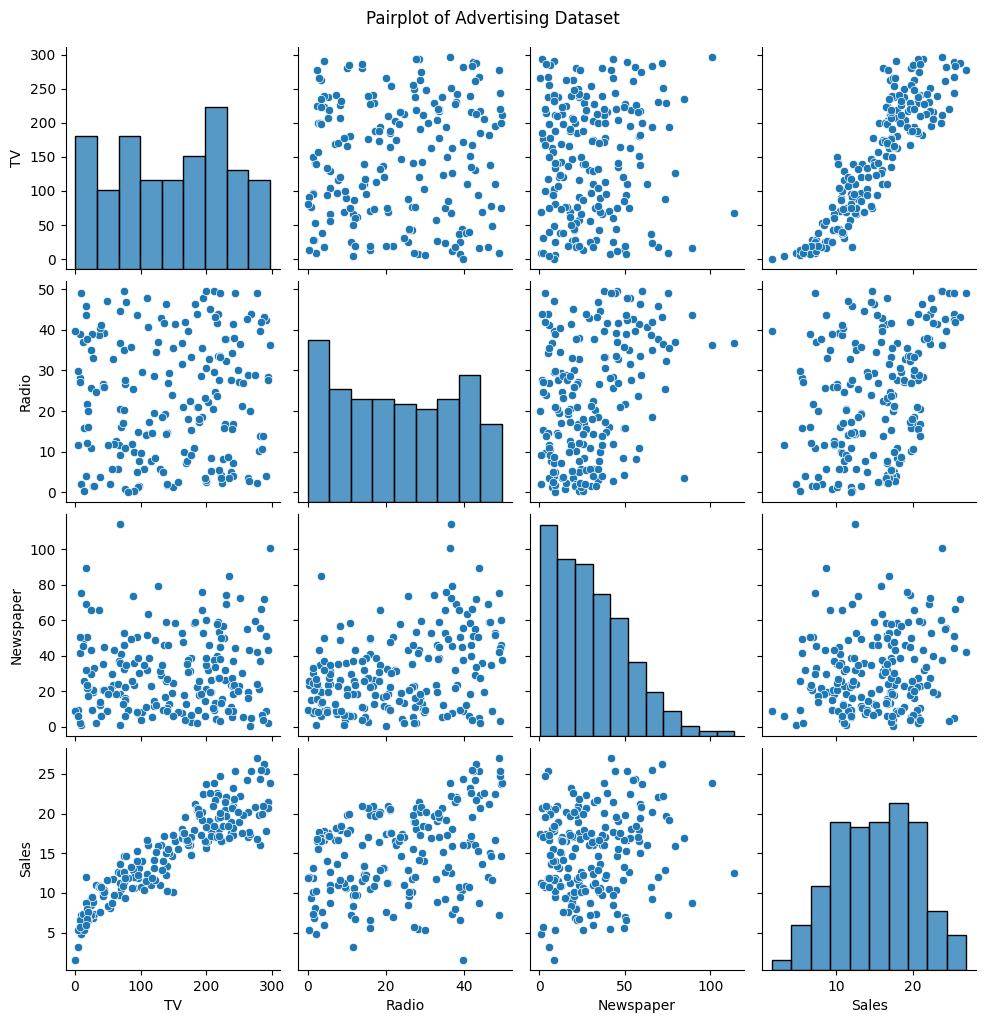

In [13]:
# Data visualization
sns.pairplot(t4_dataset)
plt.suptitle('Pairplot of Advertising Dataset', y=1.02)
plt.show()

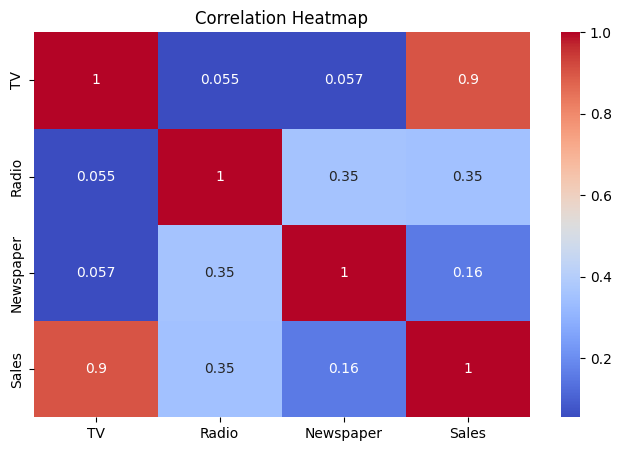

In [15]:
# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(t4_dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [18]:
# Define features and target
X = t4_dataset[['TV', 'Radio', 'Newspaper']]
y = t4_dataset['Sales']

In [20]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Train the model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Make predictions
y_pred = model.predict(X_test)

In [26]:
# Model evaluation
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"TV coef: {model.coef_[0]}")
print(f"Radio coef: {model.coef_[1]}")
print(f"Newspaper coef: {model.coef_[2]}")

print("\nEvaluation Metrics:")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Model Coefficients:
Intercept: 4.714126402214127
TV coef: 0.05450927083721978
Radio coef: 0.10094536239295579
Newspaper coef: 0.0043366468220340446

Evaluation Metrics:
R² Score: 0.9059011844150826
Mean Squared Error: 2.9077569102710896


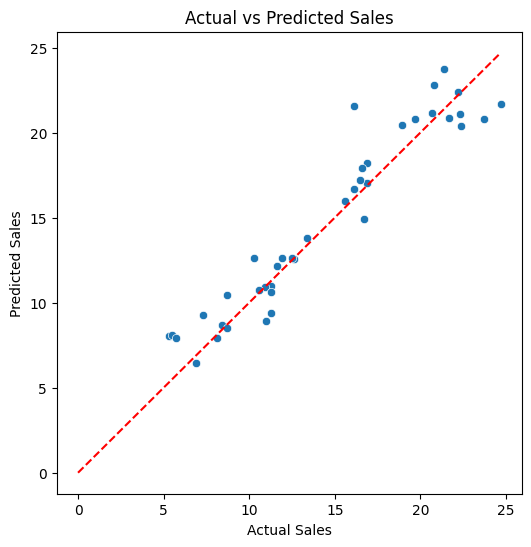

In [27]:
# Visualization - Actual vs Predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.show()